In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Though Linear regression is very good to solve many problems, it cannot be used for all datasets. First recall how linear regression, could model a dataset. It models a linear relation between a dependent variable y and independent variable x. It had a simple equation, of degree 1, for example y =  2𝑥  + 3.

C:\Users\syeda\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  import sys


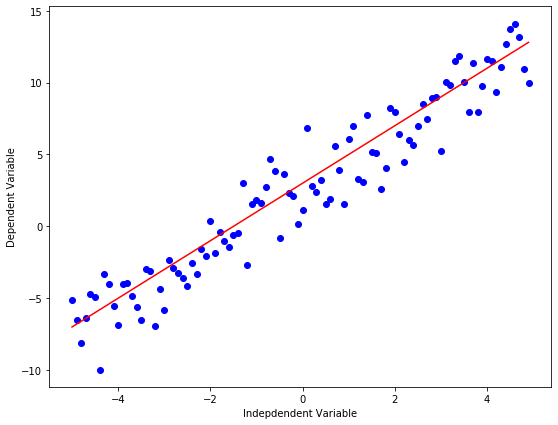

In [2]:
x=np.arange(-5.0,5.0,0.1)
y=2*(x) + 3
y_noise=2 * np.random.normal(size=x.size)
y_data=y+y_noise
plt.figure(figsize=(9,7))
plt.plot(x,y_data,'bo')
plt.plot(x,y,'R')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Let's take a look at a cubic function's graph.

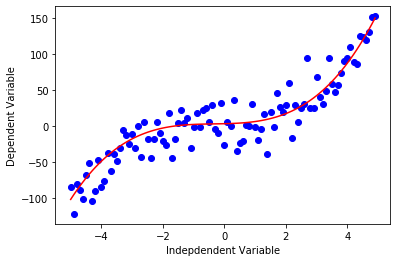

In [3]:
x=np.arange(-5.0,5.0,0.1)
y=1*(x**3) + 1*(x**2) + 1*(x) + 3
y_noise=20* np.random.normal(size=x.size)
y_data=y+y_noise
plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Quadratic

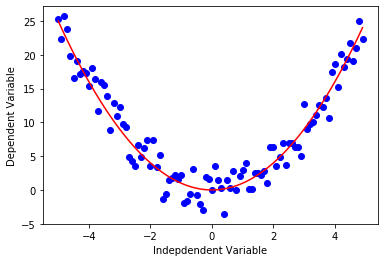

In [4]:
x=np.arange(-5.0,5.0,0.1)
y=np.power(x,2)
y_noise=2* np.random.normal(size=x.size)
y_data= y + y_noise
plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Exponential

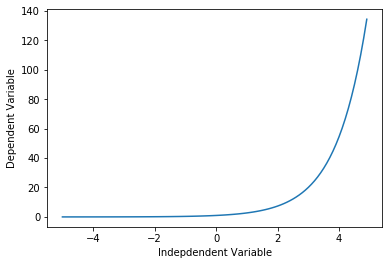

In [5]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Logarithmic

C:\Users\syeda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


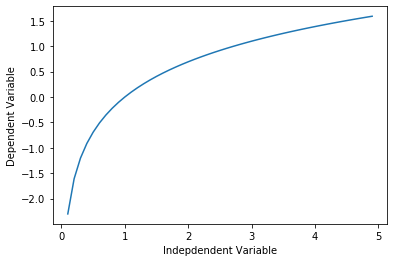

In [6]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Sigmoidal/Logistic

# 𝑌=𝑎+ 𝑏/1+𝑐(𝑋−𝑑)

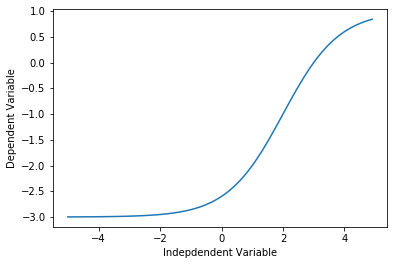

In [7]:
x=np.arange(-5.0,5.0,0.1)
y=1-4/(1+np.power(3,x-2))
plt.plot(x,y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Non-Linear Regression example

In [8]:
import numpy as np
import pandas as pd

#downloading dataset
#!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


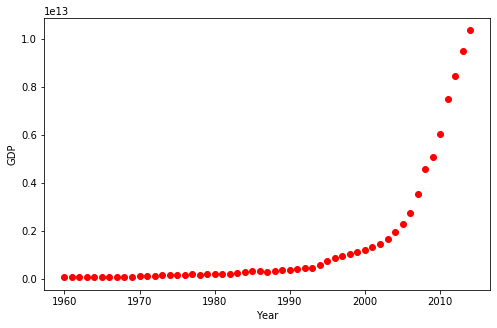

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
x_data,y_data=(df['Year'].values,df['Value'].values)
plt.plot(x_data,y_data,'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

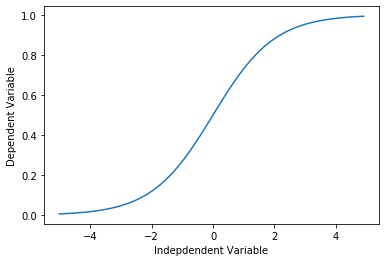

In [14]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()



The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [15]:
def sigmoid(x,Beta_1,Beta_2):
    y=1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

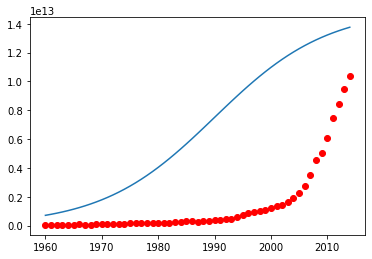

In [23]:
beta_1 = 0.10
beta_2 = 1990.0

Y_pred=sigmoid(x_data,beta_1,beta_2)
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [24]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [26]:
from scipy.optimize import curve_fit
popt,pconv=curve_fit(sigmoid,xdata,ydata)
print("beta_1 = %.f ,beta _2 = %.f" % (popt[0],popt[1]))

beta_1 = 690 ,beta _2 = 1


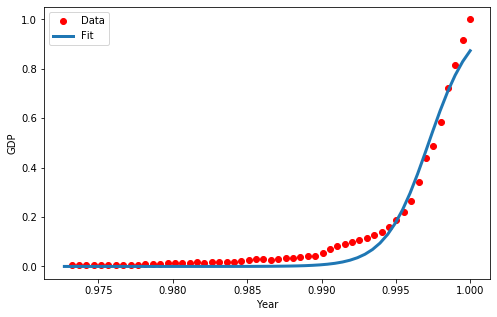

In [27]:
x=np.linspace(1960,2015,55)
x=x/max(x)
plt.figure(figsize=(8,5))
y=sigmoid(x,*popt)
plt.plot(xdata,ydata,'ro',label='Data')
plt.plot(x,y,linewidth=3.0,label='Fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Can you calculate what is the accuracy of our model?

In [28]:
# split data into train/test
msk=np.random.rand(len(df)) < 0.8
train_x=xdata[msk]
test_x=xdata[~msk]
train_y=ydata[msk]
test_y=ydata[~msk]
# build the model using train set
popt,pconv= curve_fit(sigmoid,train_x,train_y)
# predict using test set
y_hat=sigmoid(test_x,*popt)
# evaluation
print("Mean absolute error : %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("RESIDUAL SUM SQUARES(MSE) : %.2f " % np.mean((y_hat-test_y)**2))
from sklearn.metrics import r2_score
print("R2 Score : %.2f " % r2_score(y_hat,test_y))

Mean absolute error : 0.03
RESIDUAL SUM SQUARES(MSE) : 0.00 
R2 Score : 0.97 
